# ACTIVIDAD 2 - TECNICAS DE INTELIGENCIA ARTIFICAL - REGRESION

### 1. En la primer sentencia de código se exportan todas las librerías que serán utilizadas posteriormente

In [1]:
import sys
!{sys.executable} -m pip install pycm
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import type_of_target
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import SCORERS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

You should consider upgrading via the 'C:\Users\scmartinez\Anaconda3\python.exe -m pip install --upgrade pip' command.


### 2. Se procede a exportar el dataset a utilizar con pandas

In [2]:
ruta_url = 'https://www.openml.org/data/get_csv/52649/houses.arff'

leemos el achivo que contiene los datos y lo guardamos en un dataframe de Pandas

In [3]:
dataset = pd.read_csv(ruta_url)

In [4]:
print(dataset)

       median_house_value  median_income  housing_median_age  total_rooms  \
0                452600.0         8.3252                41.0        880.0   
1                358500.0         8.3014                21.0       7099.0   
2                352100.0         7.2574                52.0       1467.0   
3                341300.0         5.6431                52.0       1274.0   
4                342200.0         3.8462                52.0       1627.0   
...                   ...            ...                 ...          ...   
20635             78100.0         1.5603                25.0       1665.0   
20636             77100.0         2.5568                18.0        697.0   
20637             92300.0         1.7000                17.0       2254.0   
20638             84700.0         1.8672                18.0       1860.0   
20639             89400.0         2.3886                16.0       2785.0   

       total_bedrooms  population  households  latitude  longitude  
0     

### 3. Empezamos a explorar el dataset para conocer los aspectos generales del conjunto de datos

In [5]:
print(dataset.shape)#Para saber el número de registros (instancias) y columnas (atributos)

(20640, 9)


In [6]:
dataset.head(10)#para visualizar que valores conforman los registros

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
5,269700.0,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25
6,299200.0,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25
7,241400.0,3.1200,52.0,3104.0,687.0,1157.0,647.0,37.84,-122.25
8,226700.0,2.0804,42.0,2555.0,665.0,1206.0,595.0,37.84,-122.26
9,261100.0,3.6912,52.0,3549.0,707.0,1551.0,714.0,37.84,-122.25


In [7]:
print(dataset.groupby('median_house_value').size())#Para visualizar los valores de la clase de salida y los valores que la conforman

median_house_value
14999.0       4
17500.0       1
22500.0       4
25000.0       1
26600.0       1
           ... 
498800.0      1
499000.0      1
499100.0      1
500000.0     27
500001.0    965
Length: 3842, dtype: int64


In [8]:
dataset_stats = dataset.describe().transpose()
print(dataset_stats)

                      count           mean            std         min  \
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20640.0     537.898014     421.247906      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
latitude            20640.0      35.631861       2.135952     32.5400   
longitude           20640.0    -119.569704       2.003532   -124.3500   

                            25%          50%           75%          max  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
housing_median_age      18.0000      29.0000   

### 4. Ahora procedemos a aplicar cálculos estadísticos sobre el conjunto de datos para conocer la distribución de los valores

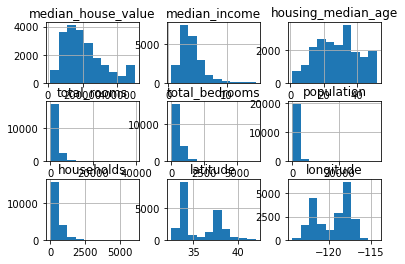

In [9]:
dataset.hist()
pyplot.show()

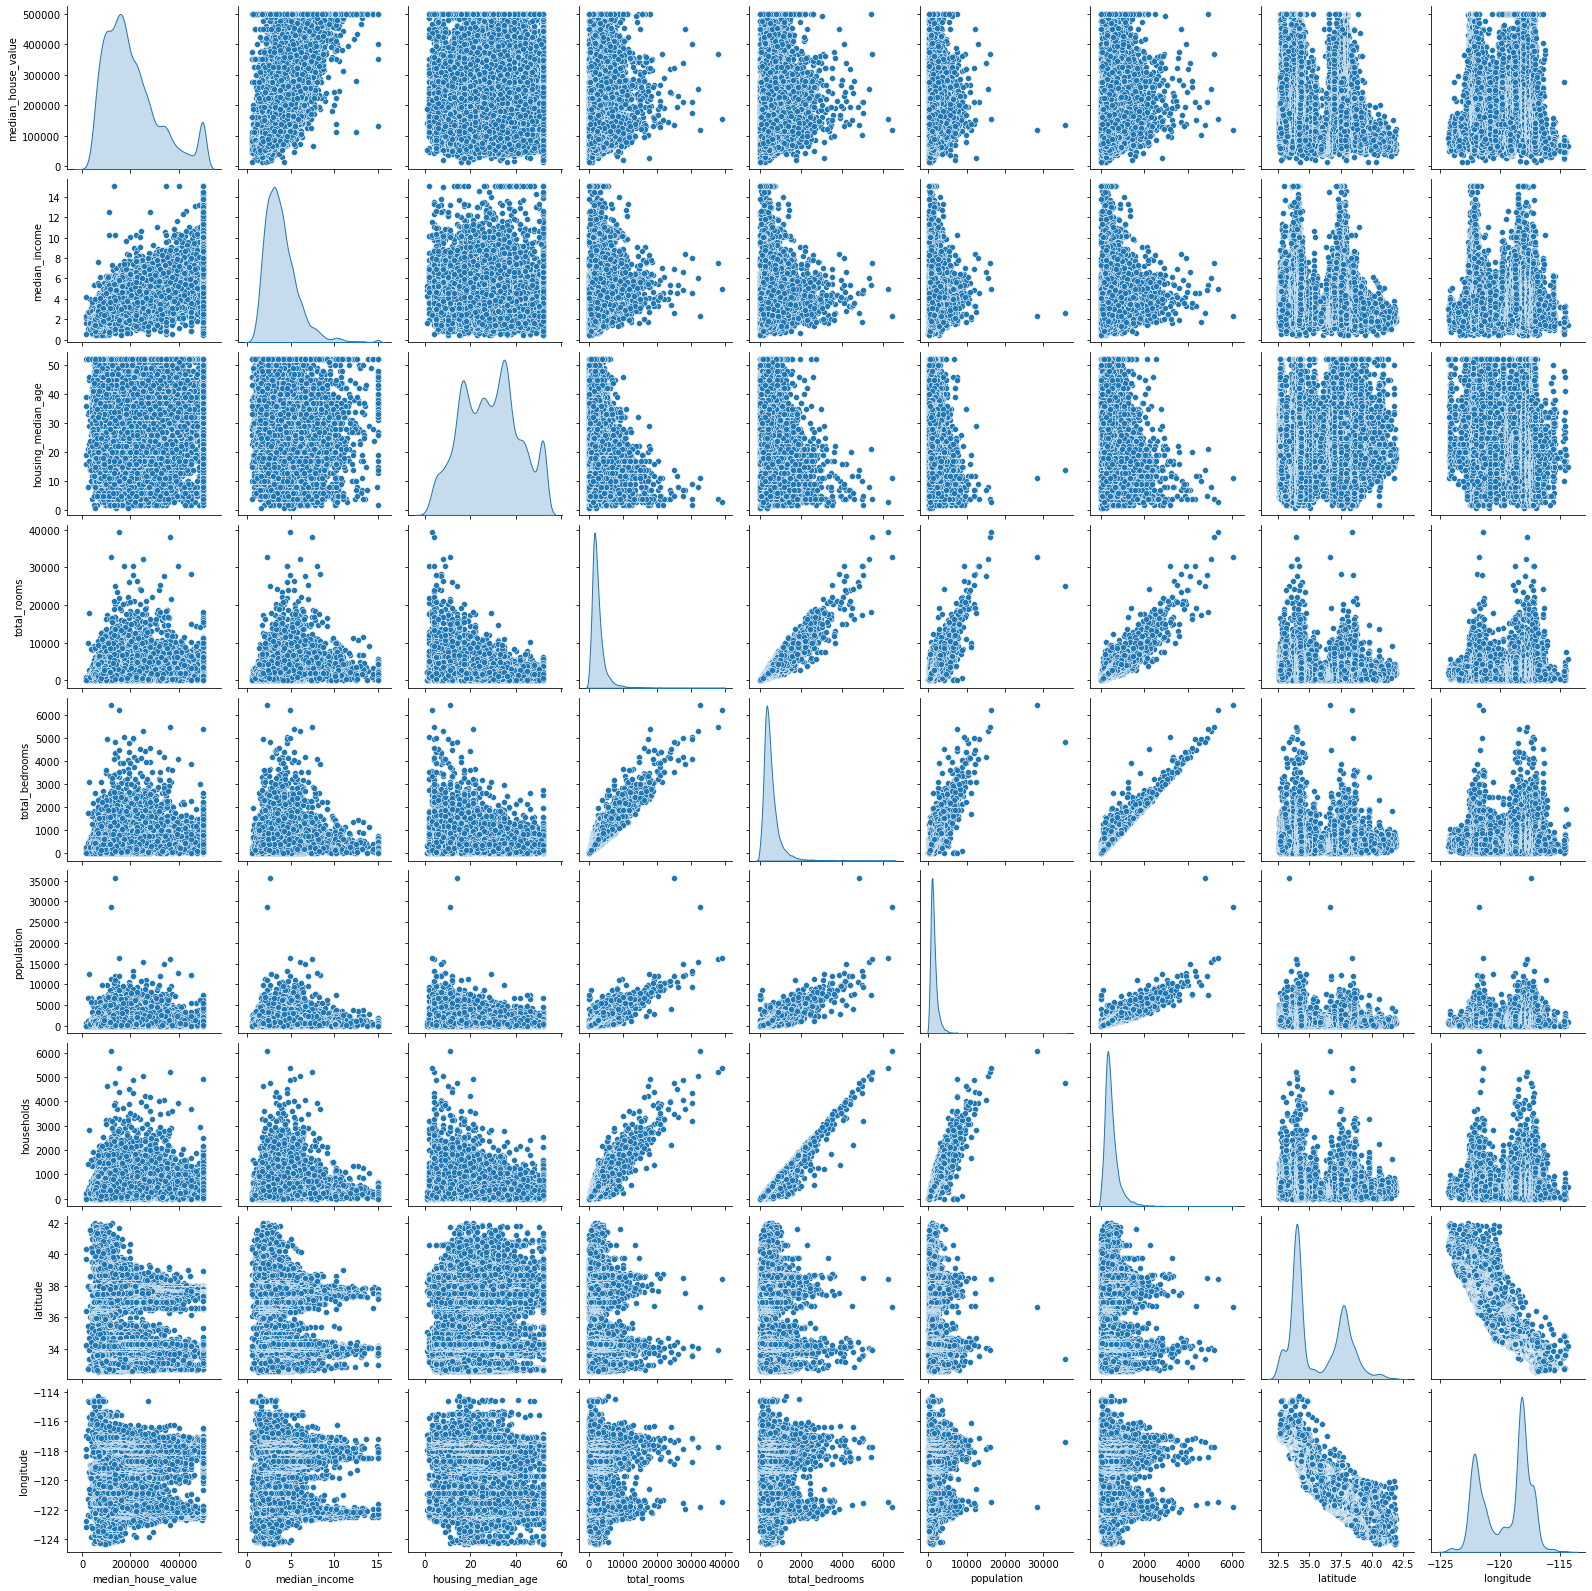

In [10]:
sns.pairplot(dataset, diag_kind="kde")

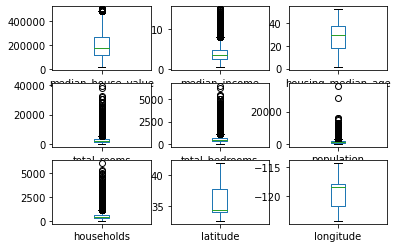

In [11]:
dataset.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

### 5. Creación del Conjunto de Entrenamiento y validación

Primero se procede a dividir el dataset, se separan los atributos de entradas, de los atributos de salida

In [12]:
lista_datos = dataset.values
X = lista_datos[:,1:9]
y = lista_datos[:, 0]

In [13]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, shuffle=True,test_size=0.20, random_state=10)

Luego se procede a normalizar los datos

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

Se verifica el tipo de datos de los conjuntos de entrenamiento y validación

In [15]:
print(type_of_target(X_train))
print(type_of_target(X_validation))
print(type_of_target(Y_train))
print(type_of_target(Y_validation))

continuous-multioutput
continuous-multioutput
multiclass
multiclass


### 6. Comparación de los modelos de clasificación

Para esta actividad se compararán dos modelos predicitvos de regresión, primero se utlizará una ***Red Neuronal*** luego se compará con el modelo predictivo de ***Regresión Lineal***

In [16]:
#Se crea el diccionario modelos donde se guardarán los modelos a utilizar
#también se creará el diccionario resultados para guardar los resultados de los modelos y realizar una comparación conjunta
modelos = {}
resultados = {'nombre_modelo':[], 'resultado': []}

In [17]:
#Se crea el primer modelo predicitvo el cual esta basado en redes neuronales
modelos['RED_NEURAL'] = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

In [18]:
#Se compila el modelo que se acaba de crear con las métricas que se desea que utilice para efectuar la predicción
optimizer = tf.keras.optimizers.RMSprop(0.001)
modelos['RED_NEURAL'].compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [19]:
#Se crean las listas donde se almacenará de forma intermedia los resultados de la validación cruzada para la red neuronal
mse_per_fold = []
loss_per_fold = []

In [20]:
# Se define el kfold para la red neuronal
kfold = KFold(n_splits=10, shuffle=True)

# Se procede a realizar la validación cruzada de la red neuronal
fold_no = 1
for train, test in kfold.split(X, y):
    # Se imprime el número de fold
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = modelos['RED_NEURAL'].fit(X[train], y[train],
              batch_size=4,
              epochs=10,
              verbose=2)

    # Se generan las métricas de cada fold
    scores = modelos['RED_NEURAL'].evaluate(X[test], y[test], verbose=0)
    print(f"Score for fold {fold_no}:{ modelos['RED_NEURAL'].metrics_names[0]} of {scores[0]}; {modelos['RED_NEURAL'].metrics_names[1]} of {scores[1]}")
    mse_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    # se incrementa el número de fold
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
4644/4644 - 3s - loss: 17118748672.0000 - mae: 95639.5547 - mse: 17118748672.0000
Epoch 2/10
4644/4644 - 2s - loss: 10104522752.0000 - mae: 78130.2578 - mse: 10104522752.0000
Epoch 3/10
4644/4644 - 2s - loss: 8784643072.0000 - mae: 72547.8828 - mse: 8784643072.0000
Epoch 4/10
4644/4644 - 2s - loss: 7685981696.0000 - mae: 67367.4297 - mse: 7685981696.0000
Epoch 5/10
4644/4644 - 2s - loss: 7182311424.0000 - mae: 64239.8008 - mse: 7182311424.0000
Epoch 6/10
4644/4644 - 2s - loss: 6751805440.0000 - mae: 61957.3203 - mse: 6751805440.0000
Epoch 7/10
4644/4644 - 2s - loss: 6390667264.0000 - mae: 59956.8242 - mse: 6390667264.0000
Epoch 8/10
4644/4644 - 2s - loss: 6094289920.0000 - mae: 58298.1367 - mse: 6094289920.0000
Epoch 9/10
4644/4644 - 2s - loss: 5859310080.0000 - mae: 56968.8086 - mse: 5859310080.0000
Epoch 10/10
4644/4644 - 2s - loss: 5721721344.0000 - mae: 56183.6523 - mse: 5721

Epoch 8/10
4644/4644 - 2s - loss: 4604067328.0000 - mae: 49368.0781 - mse: 4604067328.0000
Epoch 9/10
4644/4644 - 3s - loss: 4596493312.0000 - mae: 49290.0430 - mse: 4596493312.0000
Epoch 10/10
4644/4644 - 3s - loss: 4574542336.0000 - mae: 49319.6367 - mse: 4574542336.0000
Score for fold 8:loss of 4017598464.0; mae of 46909.1015625
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
4644/4644 - 3s - loss: 4580451328.0000 - mae: 49253.0078 - mse: 4580451328.0000
Epoch 2/10
4644/4644 - 2s - loss: 4582337536.0000 - mae: 49334.0742 - mse: 4582337536.0000
Epoch 3/10
4644/4644 - 2s - loss: 4565769728.0000 - mae: 49437.5625 - mse: 4565769728.0000
Epoch 4/10
4644/4644 - 2s - loss: 4571414528.0000 - mae: 49299.4883 - mse: 4571414528.0000
Epoch 5/10
4644/4644 - 2s - loss: 4565343744.0000 - mae: 49188.1719 - mse: 4565343744.0000
Epoch 6/10
4644/4644 - 3s - loss: 4556486144.0000 - mae: 49104.1914 - mse: 4556486144.0000
Epoch 7/10
4644/4644 - 

In [21]:
#Se obtiene la raiz cuadrada del error cuadrático
rn_rmse = []
for mse in mse_per_fold:
    rn_rmse.append(sqrt(mse))

In [22]:
#Se guardan los resultados de la precisión obtenidos en la validación cruzada en el diccionario de resultados
resultados['nombre_modelo'].append(('RED_NEURAL'))
resultados['resultado'].append((rn_rmse))

In [23]:
#Luego creamos el modelo de Regresión Lineal
modelos['LR']= LinearRegression()

In [24]:
#Se entrena mediante estratifiación cruzada para el modelo de Regresión Lineal, dividiendo los datos de entrenamiento en 10 secciones
kfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
resultado_val_cruzada = cross_val_score(modelos['LR'], X_train, Y_train, cv=kfold, scoring='neg_root_mean_squared_error')

C:\Users\scmartinez\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [25]:
#Pasamos los resultados obtenidos de la validación cruzada a positivos
lr_rmse = []
for nmse in resultado_val_cruzada:
    lr_rmse.append(abs(nmse))

In [26]:
#Viausalizamos los datos de la validación cruzada
print(lr_rmse)

[67913.7762002031, 71513.66000514384, 66378.40507812363, 75006.25468336082, 70641.45123514553, 65739.93517502515, 67746.33024767826, 71354.24118246109, 67394.9168361367, 70204.2385125177]


In [27]:
#Guardamos los resultados obtenidos en la variable resultados
resultados['nombre_modelo'].append(('LR'))
resultados['resultado'].append((lr_rmse))

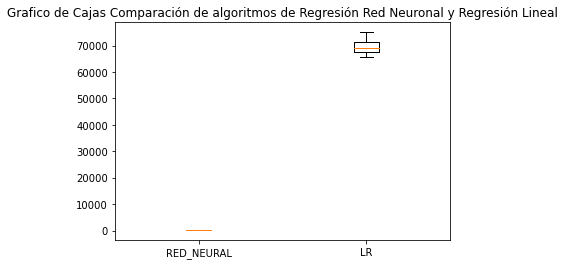

In [28]:
# Comparación de algoritmos 
pyplot.boxplot(resultados['resultado'], labels=resultados['nombre_modelo']) 
pyplot.title('Grafico de Cajas Comparación de algoritmos de Regresión Red Neuronal y Regresión Lineal')
pyplot.show()

### 7. Entrenamiento y Validación de los modelos elegidos

#### Modelo Predictivo Basado en Red Neuronal

Primero entrenamos el modelo

In [29]:
#Se entrena el modelo por diez epocas
history = modelos['RED_NEURAL'].fit(X_train, Y_train, batch_size=2, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
6605/6605 [==============================] - 9s 1ms/step - loss: 19315429376.0000 - mae: 104037.6797 - mse: 19315429376.0000 - val_loss: 12637380608.0000 - val_mae: 78724.2969 - val_mse: 12637380608.0000
Epoch 2/10
6605/6605 [==============================] - 8s 1ms/step - loss: 7379523584.0000 - mae: 61355.2422 - mse: 7379523584.0000 - val_loss: 6113676288.0000 - val_mae: 55753.4961 - val_mse: 6113676288.0000
Epoch 3/10
6605/6605 [==============================] - 7s 1ms/step - loss: 5215169536.0000 - mae: 52188.3398 - mse: 5215169536.0000 - val_loss: 5441358336.0000 - val_mae: 52099.1406 - val_mse: 5441358336.0000
Epoch 4/10
6605/6605 [==============================] - 8s 1ms/step - loss: 4675532288.0000 - mae: 48996.9531 - mse: 4675532288.0000 - val_loss: 4882964992.0000 - val_mae: 49066.7070 - val_mse: 4882964992.0000
Epoch 5/10
6605/6605 [==============================] - 8s 1ms/step - loss: 4453541888.0000 - mae: 47564.0547 - mse: 4453541888.0000 - val_loss: 4783604224

Luego calculamos el error para los datos de entrenamiento y validación

In [30]:
pred_train = modelos['RED_NEURAL'].predict(X_train)
print('Train Error: ' + str(np.sqrt(mean_squared_error(Y_train,pred_train))))

pred = modelos['RED_NEURAL'].predict(X_validation)
print('Test Error: ' + str(np.sqrt(mean_squared_error(Y_validation,pred))))

Train Error: 64907.23157430566
Test Error: 66478.51085704441


También visualizamos los resultados de entrenar la red neuronal

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,4.377929e+09,46897.203125,4.377929e+09,4.803574e+09,47611.156250,4.803574e+09,5
6,4.300742e+09,46493.785156,4.300742e+09,4.660660e+09,47250.156250,4.660660e+09,6
7,4.277540e+09,46210.261719,4.277540e+09,4.626554e+09,46860.734375,4.626554e+09,7
8,4.224409e+09,45969.480469,4.224409e+09,4.663459e+09,46572.148438,4.663459e+09,8
9,4.184685e+09,45805.945312,4.184685e+09,4.475470e+09,46359.179688,4.475470e+09,9


Graficamos la evolución del error durante el entrenamiento de la red neuronal

In [32]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  pyplot.figure()
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Mean Abs Error [MPG]')
  pyplot.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  pyplot.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  pyplot.ylim([0,100000])
  pyplot.legend()

  pyplot.figure()
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Mean Square Error [$MPG^2$]')
  pyplot.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  pyplot.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  pyplot.ylim([0,10000000])
  pyplot.legend()
  pyplot.show()


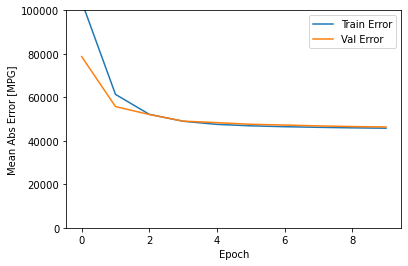

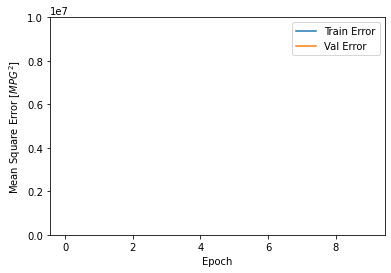

In [33]:
plot_history(history)

Evaluamos la red neuronal con los datos de validación

In [34]:
loss, mae, mse = modelos['RED_NEURAL'].evaluate(X_validation, Y_validation, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))


129/129 - 0s - loss: 4419392512.0000 - mae: 45960.9258 - mse: 4419392512.0000
Testing set Mean Abs Error: 45960.93 MPG


Realizamos predicciones con los datos de validación

In [35]:
rn_test_predictions = modelos['RED_NEURAL'].predict(X_validation).flatten()

Procedemos a graficar los resultados obtenidos en la fase de validación

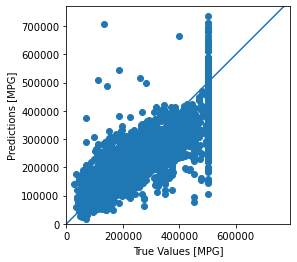

In [36]:
pyplot.scatter(Y_validation, rn_test_predictions)
pyplot.xlabel('True Values [MPG]')
pyplot.ylabel('Predictions [MPG]')
pyplot.axis('equal')
pyplot.axis('square')
pyplot.xlim([0,pyplot.xlim()[1]])
pyplot.ylim([0,pyplot.ylim()[1]])
_ = pyplot.plot([-100, 1000000], [-100, 1000000])


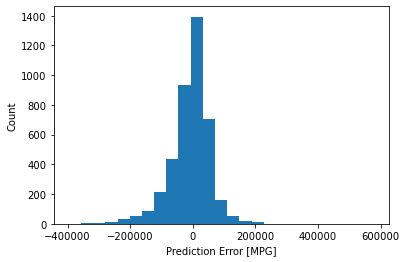

In [37]:
rn_error = rn_test_predictions - Y_validation
pyplot.hist(rn_error, bins = 25)
pyplot.xlabel("Prediction Error [MPG]")
_ = pyplot.ylabel("Count")


#### Modelo Predictivo de Regresión Lineal

Primero entrenamos el modelo con el conjunto de datos de entrenamiento

In [38]:
lr_clasificador = modelos['LR'].fit(X_train, Y_train) 

Luego lo validamos con el conjunto de datos de validación

In [39]:
lr_pred_train = modelos['LR'].predict(X_train)

En base a la validación anterior revisamos el nivel de error de nuestro modelo

In [40]:
lr_pred_train = modelos['LR'].predict(X_train)
print('Train Error: ' + str(np.sqrt(mean_squared_error(Y_train,lr_pred_train))))

lr_pred = modelos['LR'].predict(X_validation)
print('Test Error: ' + str(np.sqrt(mean_squared_error(Y_validation,lr_pred))))

Train Error: 69262.70269311876
Test Error: 70582.49506314681


In [41]:
lr_test_predictions = modelos['LR'].predict(X_validation)

Procedemos a graficar los resultados obtenidos en la fase de validación

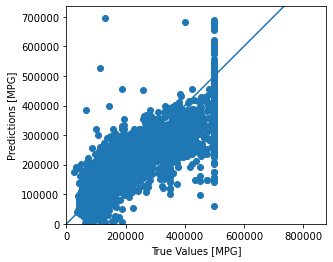

In [42]:
pyplot.scatter(Y_validation, lr_test_predictions)
pyplot.xlabel('True Values [MPG]')
pyplot.ylabel('Predictions [MPG]')
pyplot.axis('equal')
pyplot.axis('square')
pyplot.xlim([0,pyplot.xlim()[1]])
pyplot.ylim([0,pyplot.ylim()[1]])
_ = pyplot.plot([-100, 1000000], [-100, 1000000])

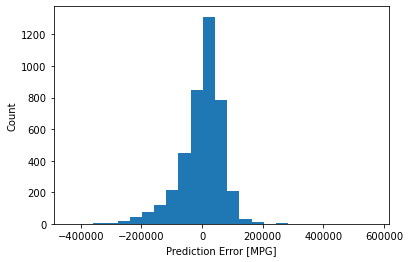

In [43]:
lr_error = lr_test_predictions - Y_validation
pyplot.hist(lr_error, bins = 25)
pyplot.xlabel("Prediction Error [MPG]")
_ = pyplot.ylabel("Count")